In [3]:
import yaml
%pylab inline
import luxeics

Populating the interactive namespace from numpy and matplotlib


In [4]:
def Propagate_e_beam(x,y,px0,py0,pz0):
    thetax=px0/pz0
    thetay=py0/pz0

    baseline = 7.5e6 

    xoffset = thetax * baseline
    yoffset = thetay * baseline
    return(x+xoffset,y+yoffset)

def Covariant_Matrix(beam_size,rms_angle,L):
    cov_at_IP_Focus = np.array([[beam_size**2, 0], [0, rms_angle**2]])
     


    #Inverse of beam transport matrix
    M = np.array([[1, -L], [0, 1]])

    cov=(M@cov_at_IP_Focus@M.T)
    return(cov)

def Gen_electron_Beam(input_filename, sample_electrons):
    
    
    
    with open( input_filename, 'r' ) as stream:
        input_dict = yaml.load(stream, Loader=yaml.SafeLoader)
    
    
    
    
    
    
    # extract beam parameters
    gamma0       = float( input_dict['beam']['gamma'] )
    energyspread = float( input_dict['beam']['energyspread'] )
    emittance    = float( input_dict['beam']['emittance'] )
    beam_size_X    = float( input_dict['beam']['sigmaX'] )        # transverse beam size x axis in microns
    beam_size_Y    = float( input_dict['beam']['sigmaY'] )        # transverse beam size y axis in microns
    beam_length  = float( input_dict['beam']['sigmaL'] )        # longitudinal beam size in microns 
    beam_charge  = float( input_dict['beam']['beam_charge'])
    L            = float( input_dict['beam']['L'])
    
    
    
    
    
    
    # rms angles for x and y space
    rms_angle_X   = emittance / beam_size_X / gamma0
    
    rms_angle_Y   = emittance / beam_size_Y / gamma0
    
    
    
    
    
    
    
    
    
    #Mean and Covariant matrices for bivariate gaussian
    
    mean_x = [0,0]  # x-offset and x' offset for focus 
    cov_x = Covariant_Matrix(beam_size_X,rms_angle_X,L)

    mean_y = [0,0]  # y-offset and y' offset for focus
    cov_y = Covariant_Matrix(beam_size_Y,rms_angle_Y,L)

    
    
    
    
    
    
    
    
    
    
    #Sampling (x,x') and (y,y')
    x,theta_x = np.random.multivariate_normal(mean_x, cov_x, sample_electrons).T
    y,theta_y = np.random.multivariate_normal(mean_y, cov_y, sample_electrons).T
    
    
    
    gamma        = np.random.normal( gamma0 , gamma0*energyspread , sample_electrons )
    beta         = sqrt(1-1./gamma**2)

    


    

    pz0          = gamma*beta*cos(theta_x)*cos(theta_y)
    px0          = gamma*beta*sin(theta_x)
    py0          = gamma*beta*sin(theta_y)
    pt0          = sqrt( 1 + px0**2 + py0**2 + pz0**2 )

    print("Done")
    
    return(x,theta_x,y,theta_y,gamma,pt0,px0,py0,pz0)


In [31]:
sample_electrons = 10000000
input_filename =r"C:\Users\Dupish\Documents\GitHub\luxeics\YML_Files\First_Run.yml"
x,theta_x,y,theta_y,gamma,pt0,px0,py0,pz0 = Gen_electron_Beam(input_filename, sample_electrons)

Done


Text(0.5, 1.0, ' Electron Beam Size')

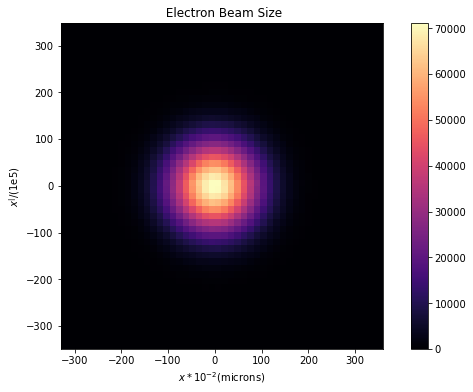

In [29]:
figure(figsize=(10,6))

#bbins=(linspace(-4,4,500),linspace(-2.5,2.5,500))
bbins=(50,50)
subplot(111,aspect=1)
hist2d(x,y,bins=bbins,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$x * 10 ^{ - 2 }$(microns)')
ylabel(r'$x^{|}$/(1e5)')
title(f' Electron Beam Size')


No handles with labels found to put in legend.


0.015761730352635527 65.22163369806354


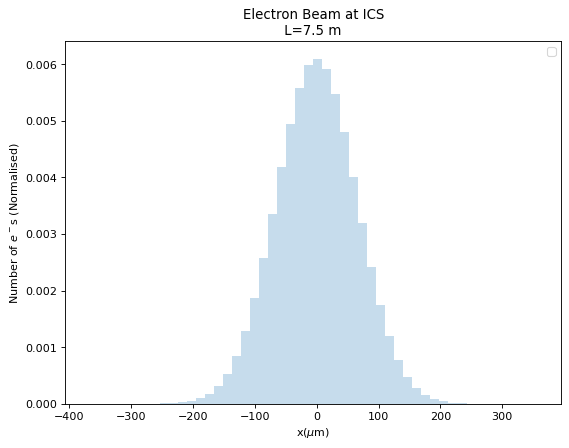

In [68]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=80)
hist(x,bins=50,alpha=0.25 ,density=1)
title( "Electron Beam at ICS\n L=7.5 m ")
mean,std=norm.fit(x)
xmin, xmax = plt.xlim()
x1 = linspace(xmin, xmax, 1000)
y = norm.pdf(x1, 0, std)
#plot(x1, y,label=r" Focus : Strong IP, $\sigma_x=\sigma_y=5$ $\mu$m")
y2 = norm.pdf(x1, 0, 5)
#plot(x1, y2,label=r" Focus : ICS, $\sigma_x=\sigma_y=5$ $\mu$m")
legend(loc=1)
ylabel("Number of $e^-$s (Normalised)" )
xlabel("x($\mu$m)")
plt.savefig("Electron_Beam_Waist_Comparison.pdf")
print(mean,std)

Text(0.5, 1.0, ' sampling')

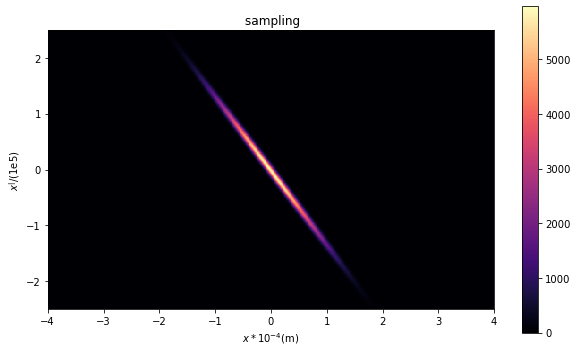

In [19]:
figure(figsize=(10,6))

bbins=(linspace(-4,4,500),linspace(-2.5,2.5,500))

subplot(111,aspect=1)
hist2d(x*10**(-2),theta_x*10**5,bins=bbins,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$x * 10 ^{ - 4 }$(m)')
ylabel(r'$x^{|}$/(1e5)')
title(f' sampling')



In [74]:
################################
#Propagation of the Electrons to the focus
x_focus,y_focus = Propagate_e_beam(x,y,px0,py0,pz0)


In [1]:


figure(figsize=(10,8))

bbins=(linspace(-30,30,500),linspace(-25,25,500))

subplot(111,aspect=1)
hist2d(x_focus,theta_x*10**6,bins=bbins,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$x$($\mu$m)')
ylabel(r'$x^{|}$/(1e5)')
title(f' sampling')



NameError: name 'figure' is not defined

Text(0.5, 1.0, ' sampling')

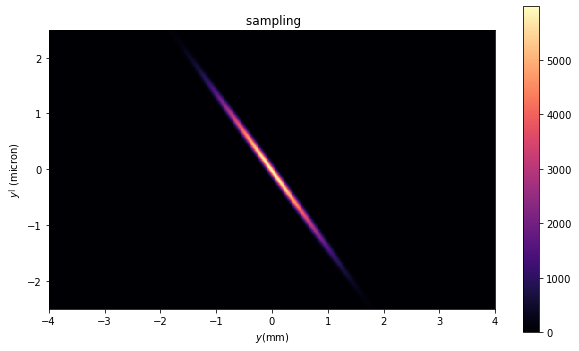

In [76]:
figure(figsize=(10,6))

bbins=(linspace(-4,4,500),linspace(-2.5,2.5,500))

subplot(111,aspect=1)
hist2d(y*10**(-2),theta_y*10**5,bins=bbins,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$y$(mm)')
ylabel(r'$y^{|}$ (micron)')
title(f' sampling')



Text(0.5, 1.0, ' sampling')

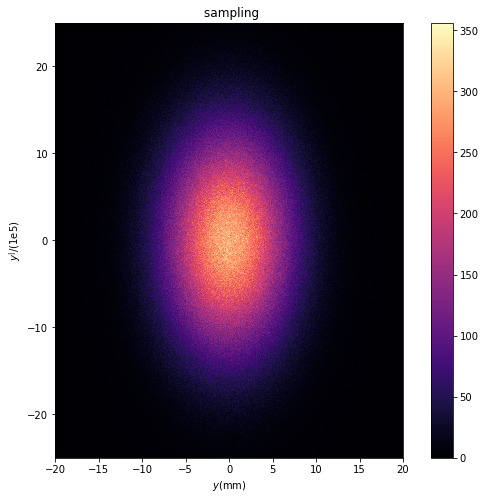

In [77]:


figure(figsize=(10,8))

bbins=(linspace(-20,20,500),linspace(-25,25,500))

subplot(111,aspect=1)
hist2d(y_focus,theta_y*10**6,bins=bbins,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$y$(mm)')
ylabel(r'$y^{|}$/(1e5)')
title(f' sampling')

